In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler_val = MinMaxScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)

(397, 327)
(397, 324)
(397,)
(22, 327)
(22, 324)
(22,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(822, 324) (822,)
(822, 324) (822,)


In [4]:
# SVM, Grid Search
k_folds = 5
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-3, 2, 6), 
    'gamma': np.logspace(-3, 2, 6), 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

Best Score: 0.5044
shrinking => False
probability => False
kernel => rbf
gamma => 0.01
C => 1.0
Splits: 5
Vanilla Train Accuracy: 52.3929%
Vanilla Validation Accuracy: 40.91%


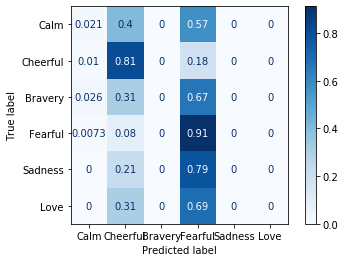

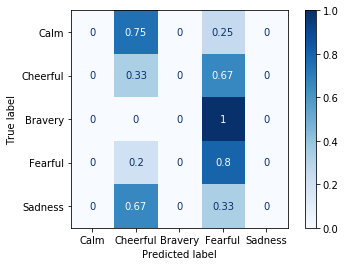

In [5]:
print_res("Vanilla",x_train,y_train,random_search_svm)
test_res("Vanilla",x_val,y_val,random_search_svm)

Best Score: 0.8310
shrinking => False
probability => True
kernel => rbf
gamma => 1.0
C => 10.0
Splits: 5
Random Oversampling Train Accuracy: 100.0000%
Random Oversampling Validation Accuracy: 45.45%


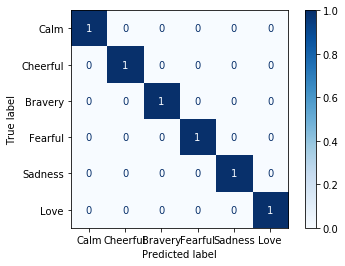

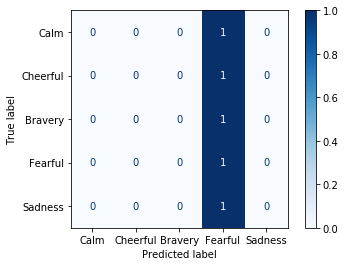

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_svm)
test_res("Random Oversampling",x_val,y_val,random_search_svm)

In [8]:
y_pred = random_search_svm.predict(x_val)
print(y_pred)
print(y_val)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[4. 3. 2. 4. 4. 1. 6. 1. 2. 1. 2. 4. 4. 4. 4. 1. 4. 6. 6. 4. 3. 4.]


In [7]:
print_res("SMOTE",x_smote,y_smote,random_search_svm)
test_res("SMOTE",x_val,y_val,random_search_svm)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 833, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 521, in wrap_future_result
    return future.result(timeout=timeout)
  File "C:\ProgramData\Anaconda3\lib\concurrent\futures\_base.py", line 427, in result
    self._condition.wait(timeout)
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-59be4288fe42>", line 1, in <module>
    print_res("SMOTE",x_smote,y_smote,random_search_svm)
  File "D:\DLSU\Research Work\XLB\XLB48\Note

TypeError: can only concatenate str (not "list") to str

In [ ]:
# LinearSVM, Randomized Search
k_folds = 5
random_search_iterations = 100
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-3, 2, 6), 
    'multi_class':['ovr', 'crammer_singer'], 
    'max_iter':[100, 150, 200]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

In [ ]:
print_res("Vanilla",x_train,y_train,random_search_linear)
test_res("Vanilla",x_val,y_val,random_search_linear)

In [ ]:
print_res("Random Oversampling",x_os,y_os,random_search_linear)
test_res("Random Oversampling",x_val,y_val,random_search_linear)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_linear)
test_res("SMOTE",x_val,y_val,random_search_linear)